In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
import os
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import matplotlib
%matplotlib inline

# Add the parent directory to the path to import the package
sys.path.insert(0, os.path.abspath('../../src'))
from spice.models.mesh_generation import icosphere
from spice.models.mesh_model import IcosphereModel

def values_for_icosphere(n_vertices: int, radius: float):
    # Create an IcosphereModel
    radius = 1.0  # Solar radii
    mass = 1.0    # Solar masses
    parameters = jnp.ones(1)  # Simple parameter array
    parameter_names = ["teff"]  # Parameter name

    # Construct the model
    icosphere_model = IcosphereModel.construct(
        n_vertices=n_vertices,
        radius=radius,
        mass=mass,
        parameters=parameters,
        parameter_names=parameter_names,
        override_log_g=False
    )
    sun_surface_area = 4 * np.pi * (radius*u.R_sun.to(u.m))**2
    icosphere_surface_area = np.sum(icosphere_model.areas)*(radius*u.R_sun.to(u.m))**2
    return len(icosphere_model.radii), np.mean(icosphere_model.radii)/radius, icosphere_surface_area/sun_surface_area

In [28]:
# Test with different numbers of vertices
vertex_counts = [100, 1000, 2000, 10000]
results = []

for n_vertices in vertex_counts:
    vertices_count, mean_radius_ratio, surface_area_ratio = values_for_icosphere(n_vertices, 1.0)
    results.append((vertices_count, mean_radius_ratio, surface_area_ratio))
    print(f"Vertices: {vertices_count}, Mean Radius Ratio: {mean_radius_ratio:.6f}, Surface Area Ratio: {surface_area_ratio:.6f}")

Vertices: 320, Mean Radius Ratio: 0.984890, Surface Area Ratio: 0.981178
Vertices: 1280, Mean Radius Ratio: 0.996190, Surface Area Ratio: 0.995235
Vertices: 5120, Mean Radius Ratio: 0.999045, Surface Area Ratio: 0.998805
Vertices: 20480, Mean Radius Ratio: 0.999761, Surface Area Ratio: 0.999701


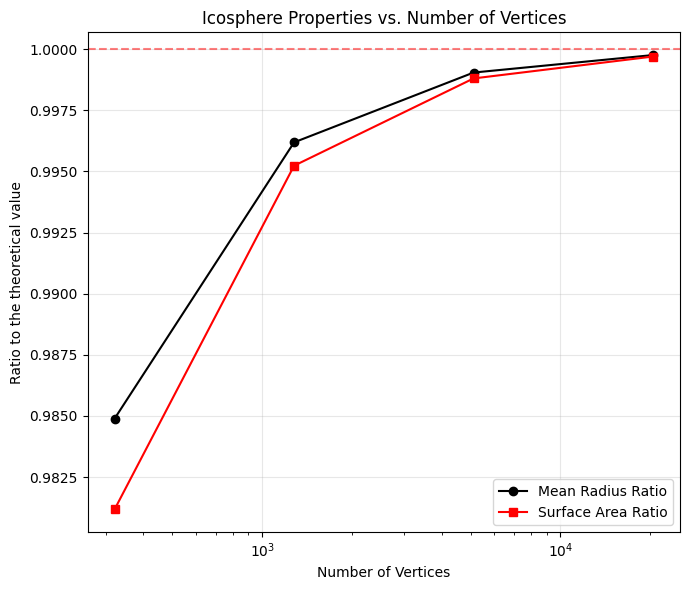

In [37]:
# Extract data for plotting
vertices = [r[0] for r in results]
mean_radius_ratios = [r[1] for r in results]
surface_area_ratios = [r[2] for r in results]

# Create a single figure with one axis
fig, ax = plt.subplots(figsize=(7, 6))

# Plot both metrics on the same axis
ax.plot(vertices, mean_radius_ratios, 'o-', color='black', label='Mean Radius Ratio')
ax.plot(vertices, surface_area_ratios, 's-', color='red', label='Surface Area Ratio')

# Set labels and formatting
ax.set_xlabel('Number of Vertices')
ax.set_ylabel('Ratio to the theoretical value')
ax.set_xscale('log')
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.5)
ax.grid(True, alpha=0.3)

# Add a title and legend
plt.title('Icosphere Properties vs. Number of Vertices')
ax.legend(loc='best')

plt.tight_layout()
plt.show()


In [17]:
# Calculate the Sun's surface area using the formula 4πR²
# where R is the solar radius in meters
solar_radius_m = const.R_sun.value  # Solar radius in meters
sun_surface_area = 4 * np.pi * solar_radius_m**2

# Display the result
print(f"Sun's surface area: {sun_surface_area:.4e} m²")

# Compare with our icosphere model's total area
icosphere_area_m2 = np.sum(icosphere_model.areas) * u.R_sun.to(u.m)**2
print(f"Icosphere model area: {icosphere_area_m2:.4e} m²")
print(f"Ratio (icosphere/actual): {icosphere_area_m2/sun_surface_area:.6f}")


Sun's surface area: 6.0821e+18 m²
Icosphere model area: 5.9676e+18 m²
Ratio (icosphere/actual): 0.981178
